In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns

sns.set(style="whitegrid", font_scale=1.75)

import scipy.special as sp
import sklearn.datasets as datasets
import sklearn.linear_model as lm
import sklearn.ensemble as en
import sklearn.tree as tree
import econml
import importlib

#### data generation packages
import strawman_edge
import strawman_center
import all_linear

#### main packages
import characterize
import estimate_atte as est
import learn_w as learn
import black

importlib.reload(est)
importlib.reload(learn)

import warnings

warnings.filterwarnings("ignore")

%load_ext jupyter_black

The jupyter_black extension is already loaded. To reload it, use:
  %reload_ext jupyter_black


# Box DGP

In [25]:
df, Y = strawman_edge.get_data(n=10000, seed=0)
outcome = "Yobs"
treatment = "T"
sample = "S"

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
ATE Est: 0.0948
leaf    0.500000
X0      0.174193
X1      0.172023
X2      0.001600
X3      0.017953
X4      0.023129
X5      0.023750
X6      0.029563
X7      0.026457
X8      0.026519
X9      0.004812
dtype: float64


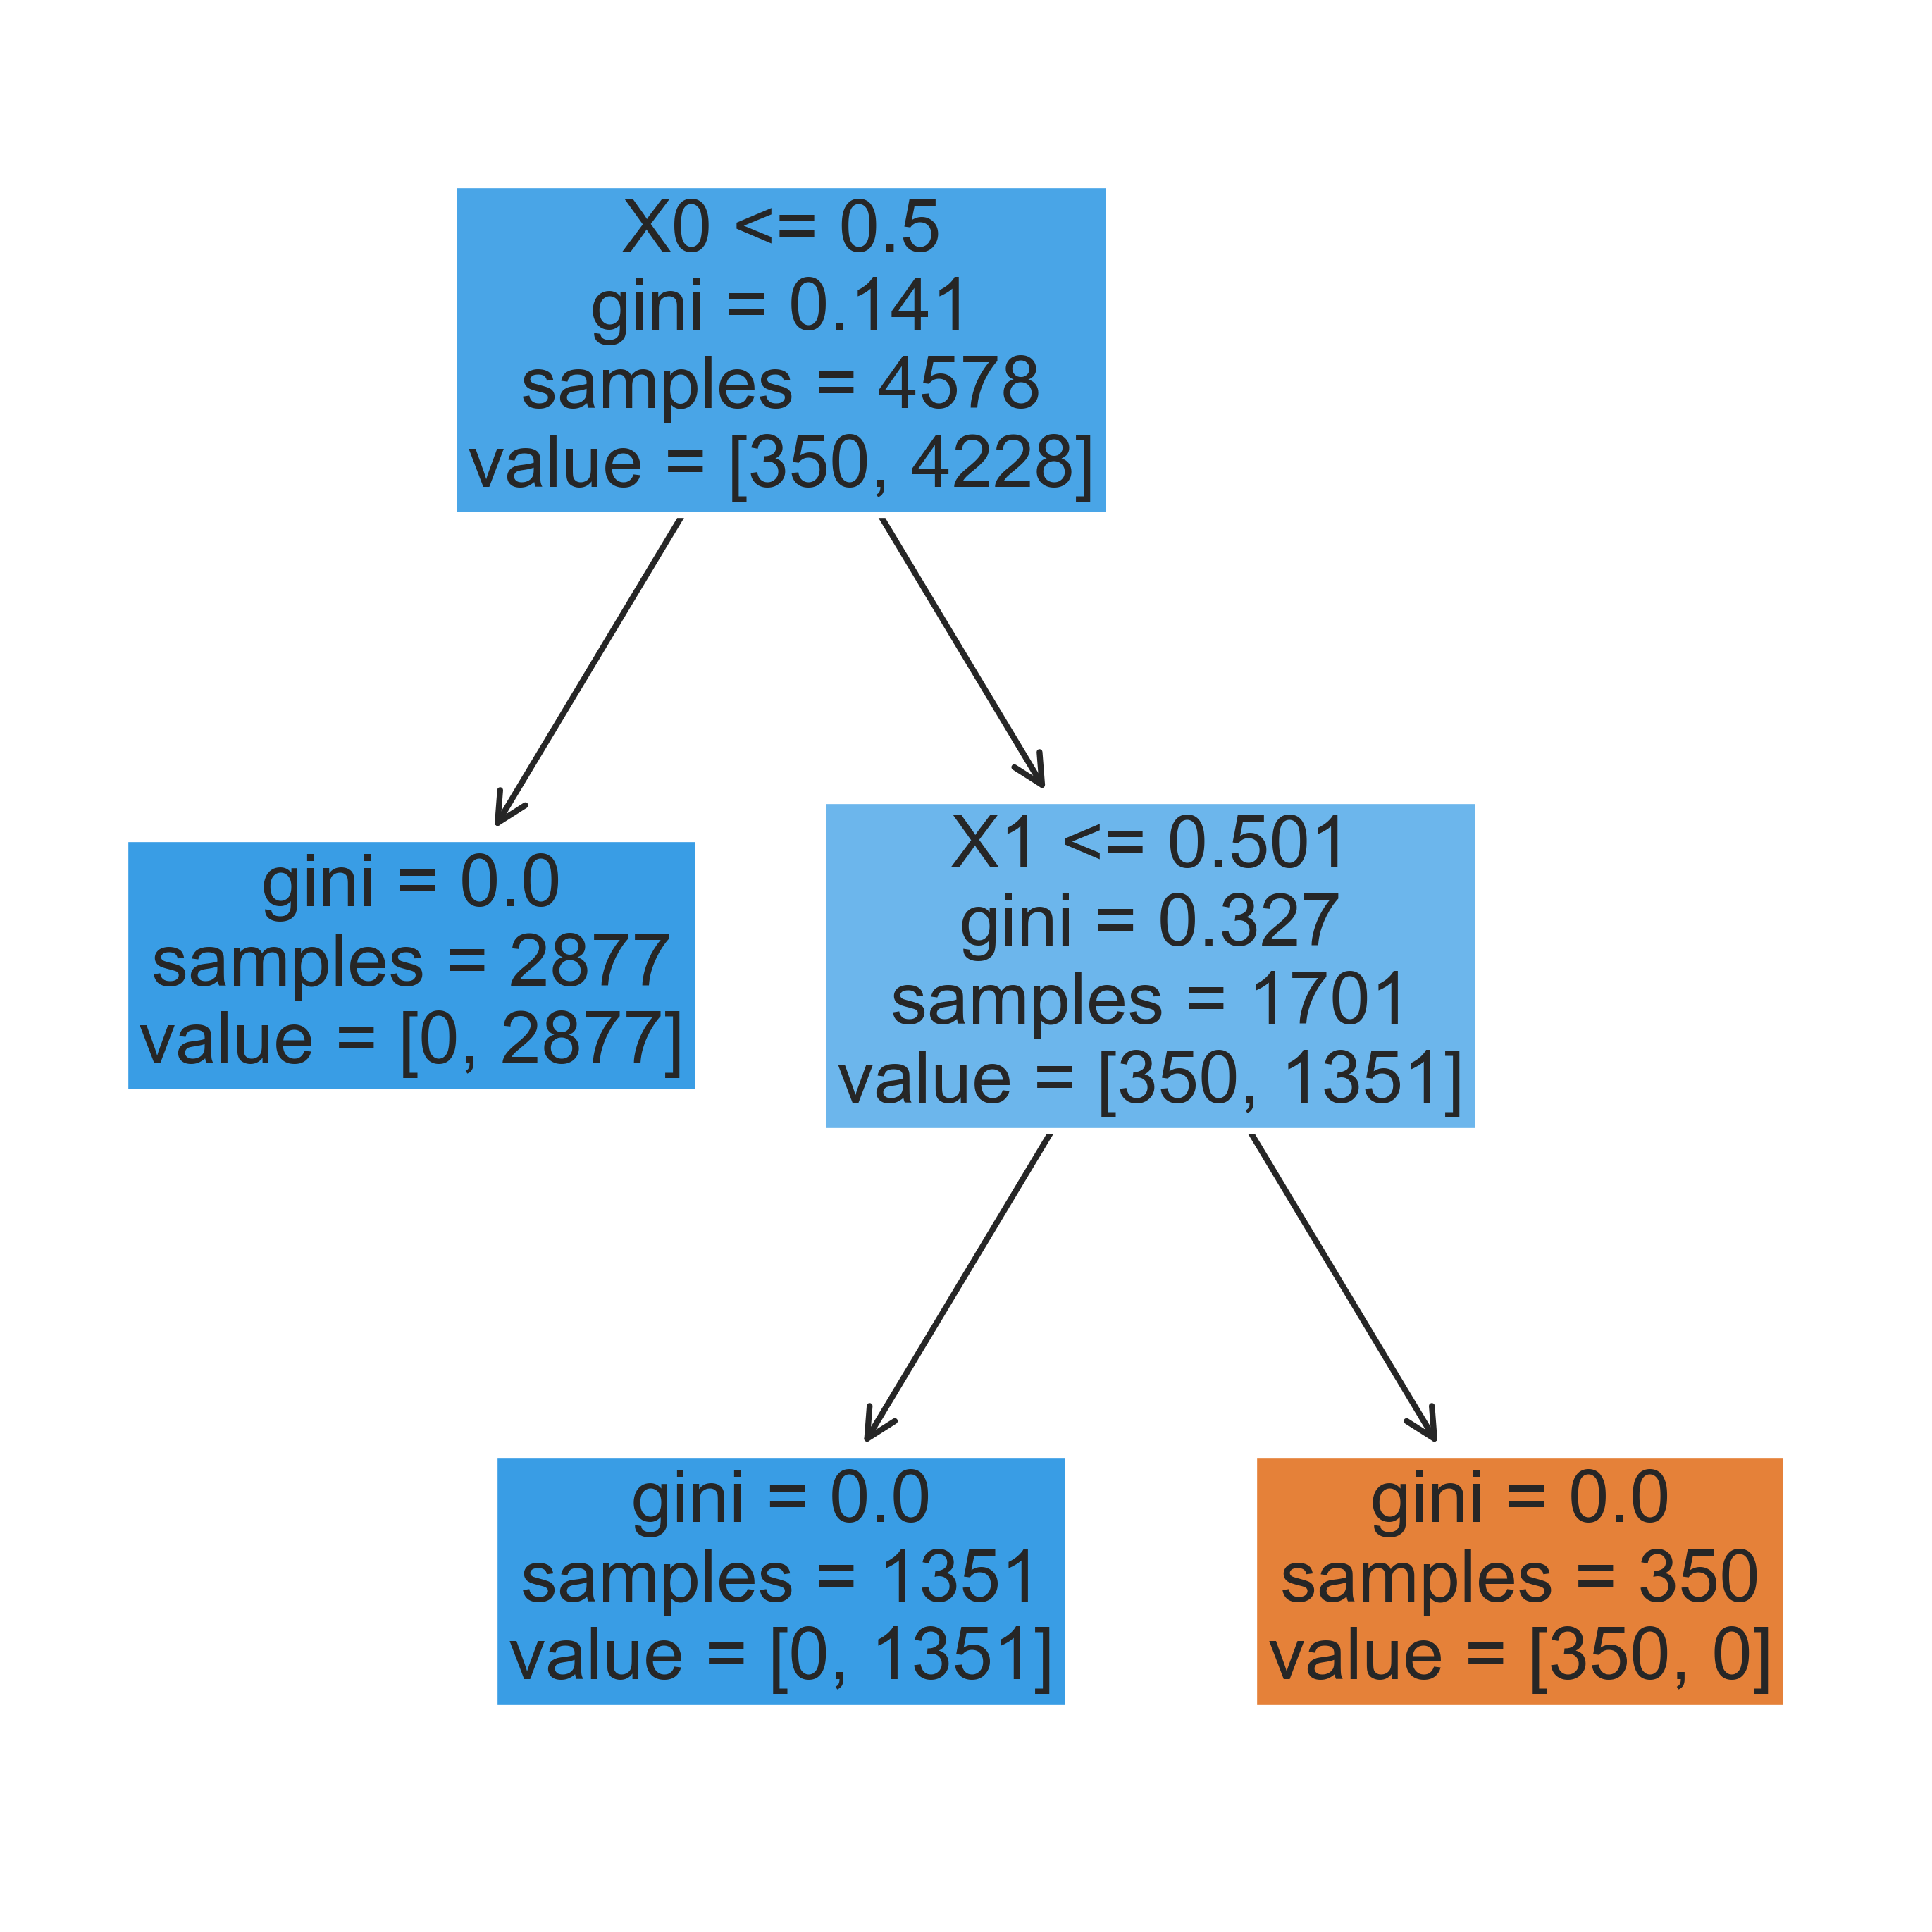

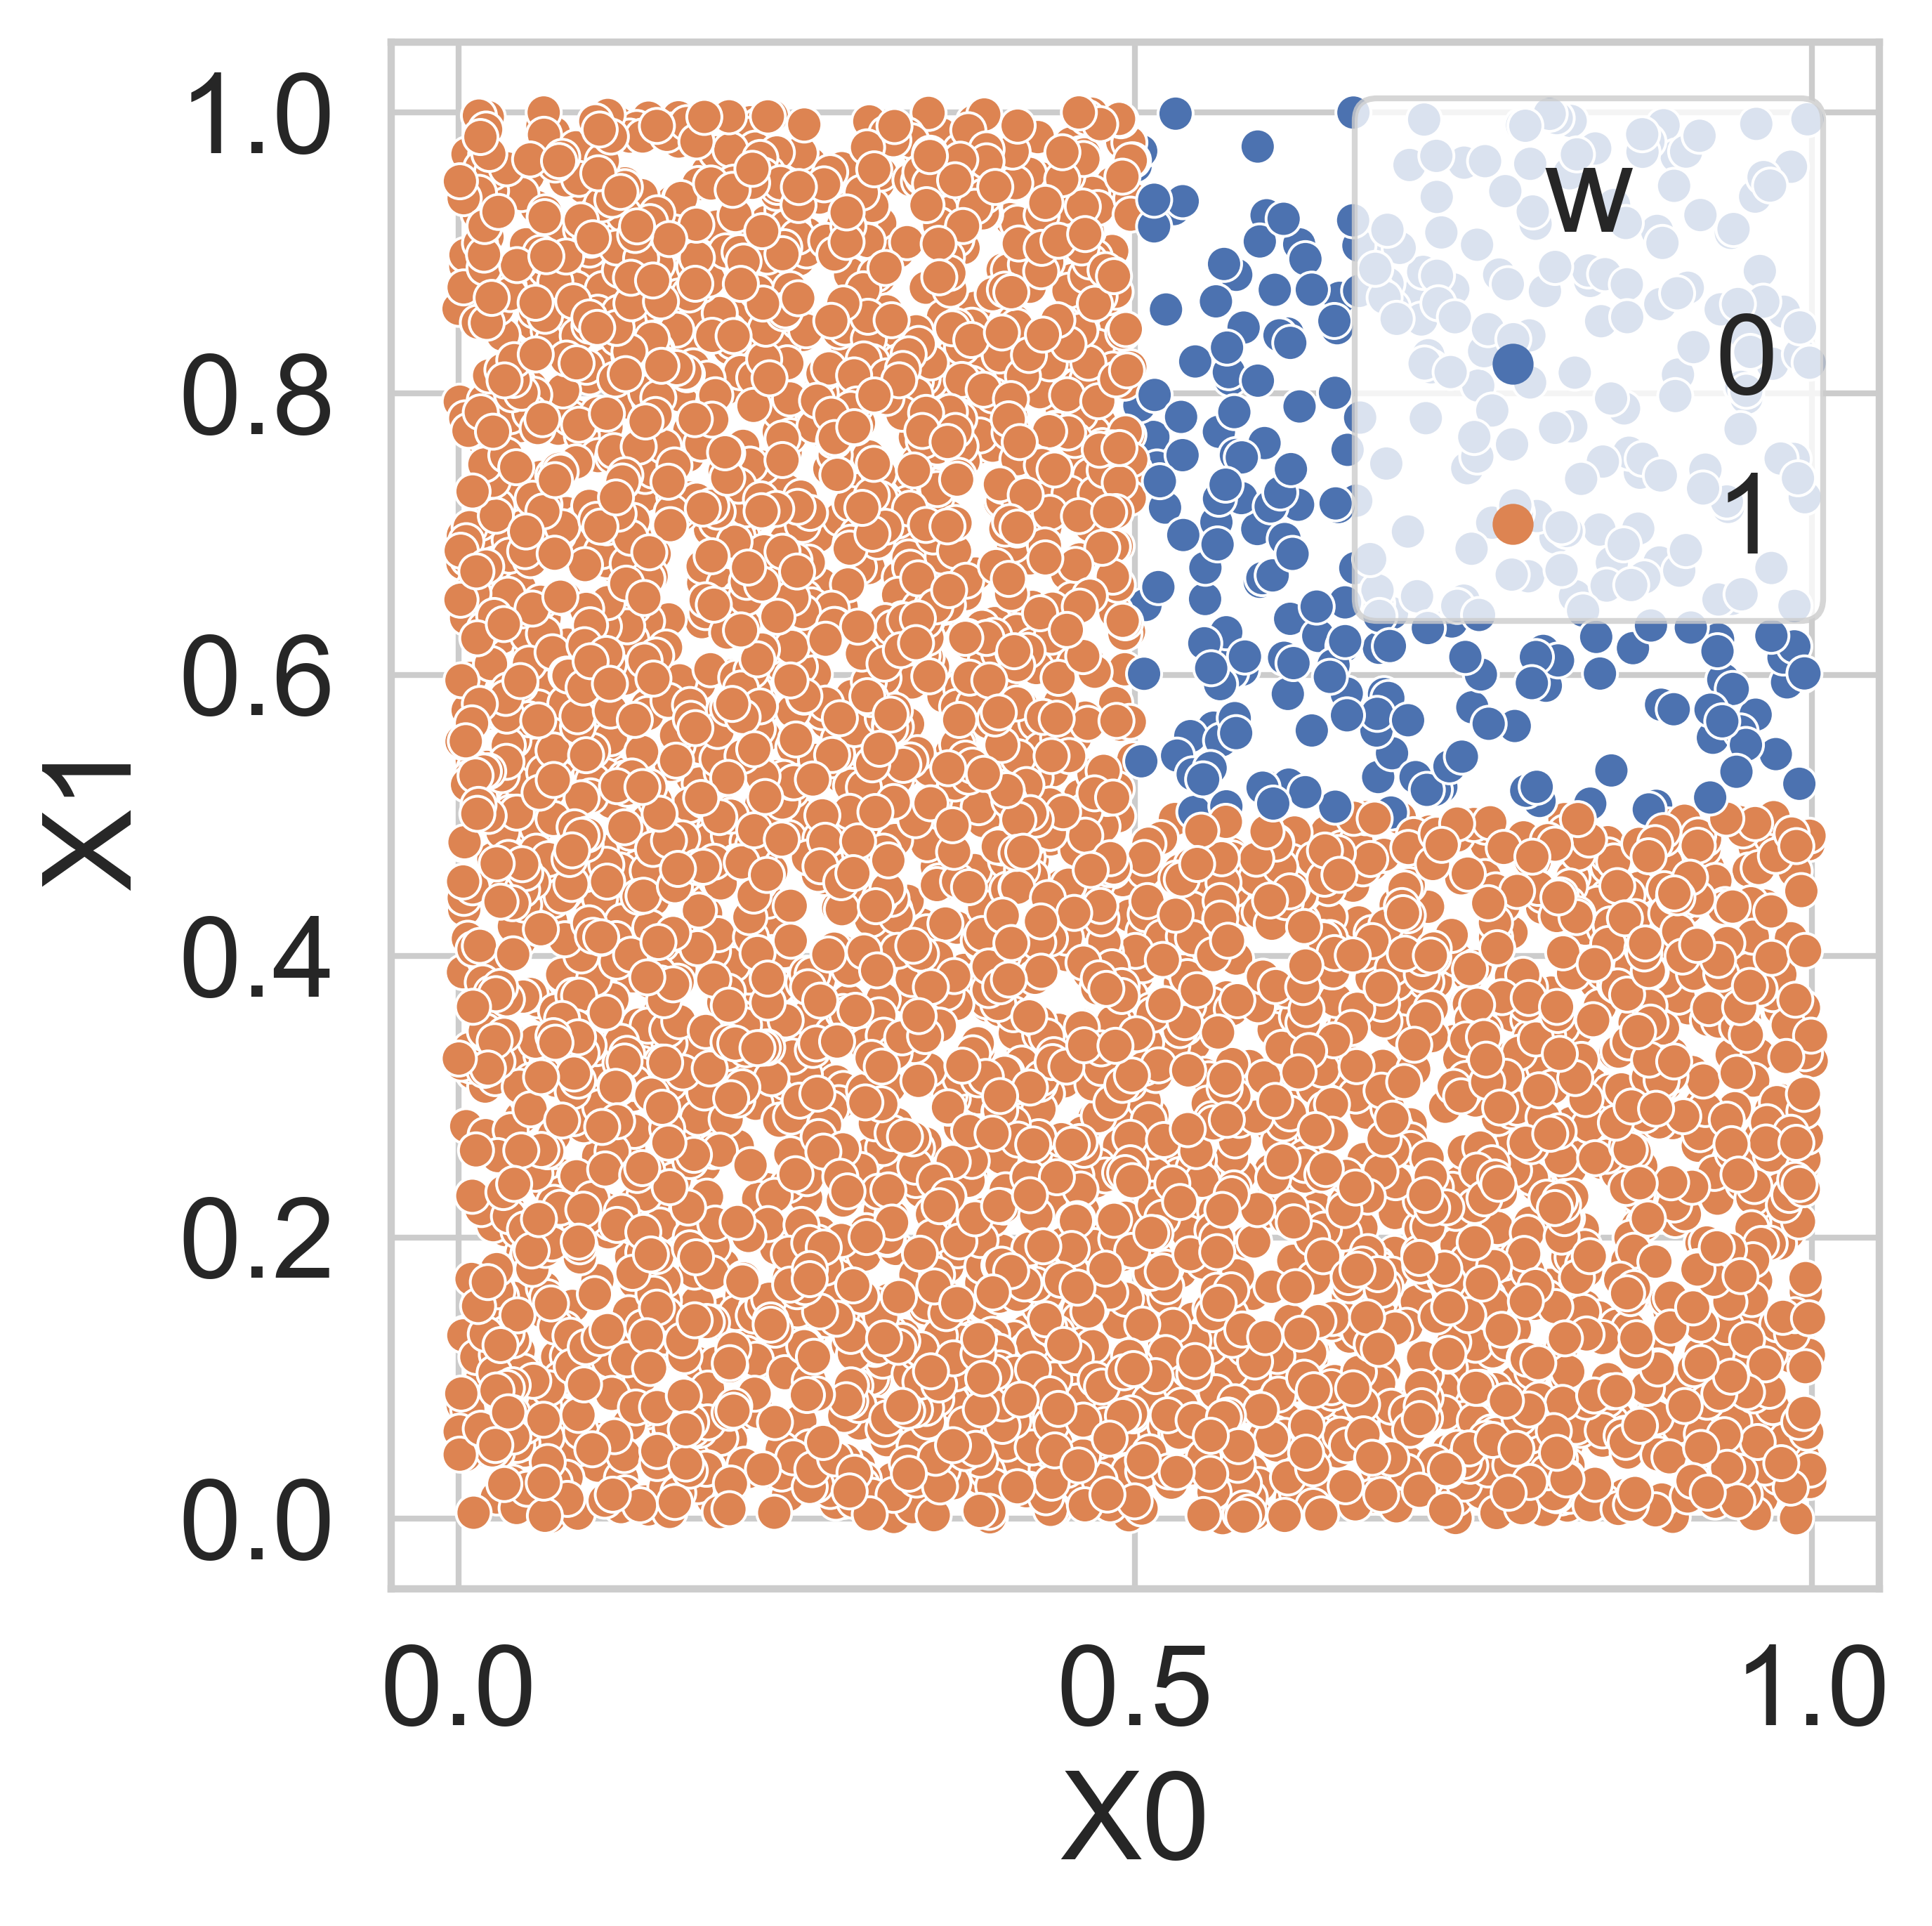

In [26]:
importlib.reload(learn)
D_rash, D_forest, w_forest, rashomon_set, f, testing_data = learn.forest_opt(
    data=df,
    outcome=outcome,
    treatment=treatment,
    sample=sample,
    leaf_proba=1,
    num_trees=3000,
    vote_threshold=2 / 5,
)
baseline_loss = np.sqrt(np.sum(D_forest["vsq"]) / ((np.sum((1 - D_forest["S"])) ** 2)))

fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
tree.plot_tree(
    f,
    filled=True,
    feature_names=df.drop(columns=[outcome, treatment, sample]).columns,
    ax=ax,
)
plt.tight_layout()
fig.savefig("explain_box.pdf", format="pdf", dpi=600)

fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
sns.scatterplot(x="X0", y="X1", hue="w_opt", data=D_rash, ax=ax)
plt.legend(title="w")
plt.tight_layout()
fig.savefig("forest_box.pdf", format="pdf", dpi=600)

# Community DGP

In [27]:
importlib.reload(strawman_center)
df, Y = strawman_center.get_data(n=5000, seed=0)
outcome = "Yobs"
treatment = "T"
sample = "S"

Fold 0
Fold 1
Fold 2
Fold 3
Fold 4
ATE Est: 0.2995
leaf    0.500000
X0      0.359133
X1      0.140867
dtype: float64


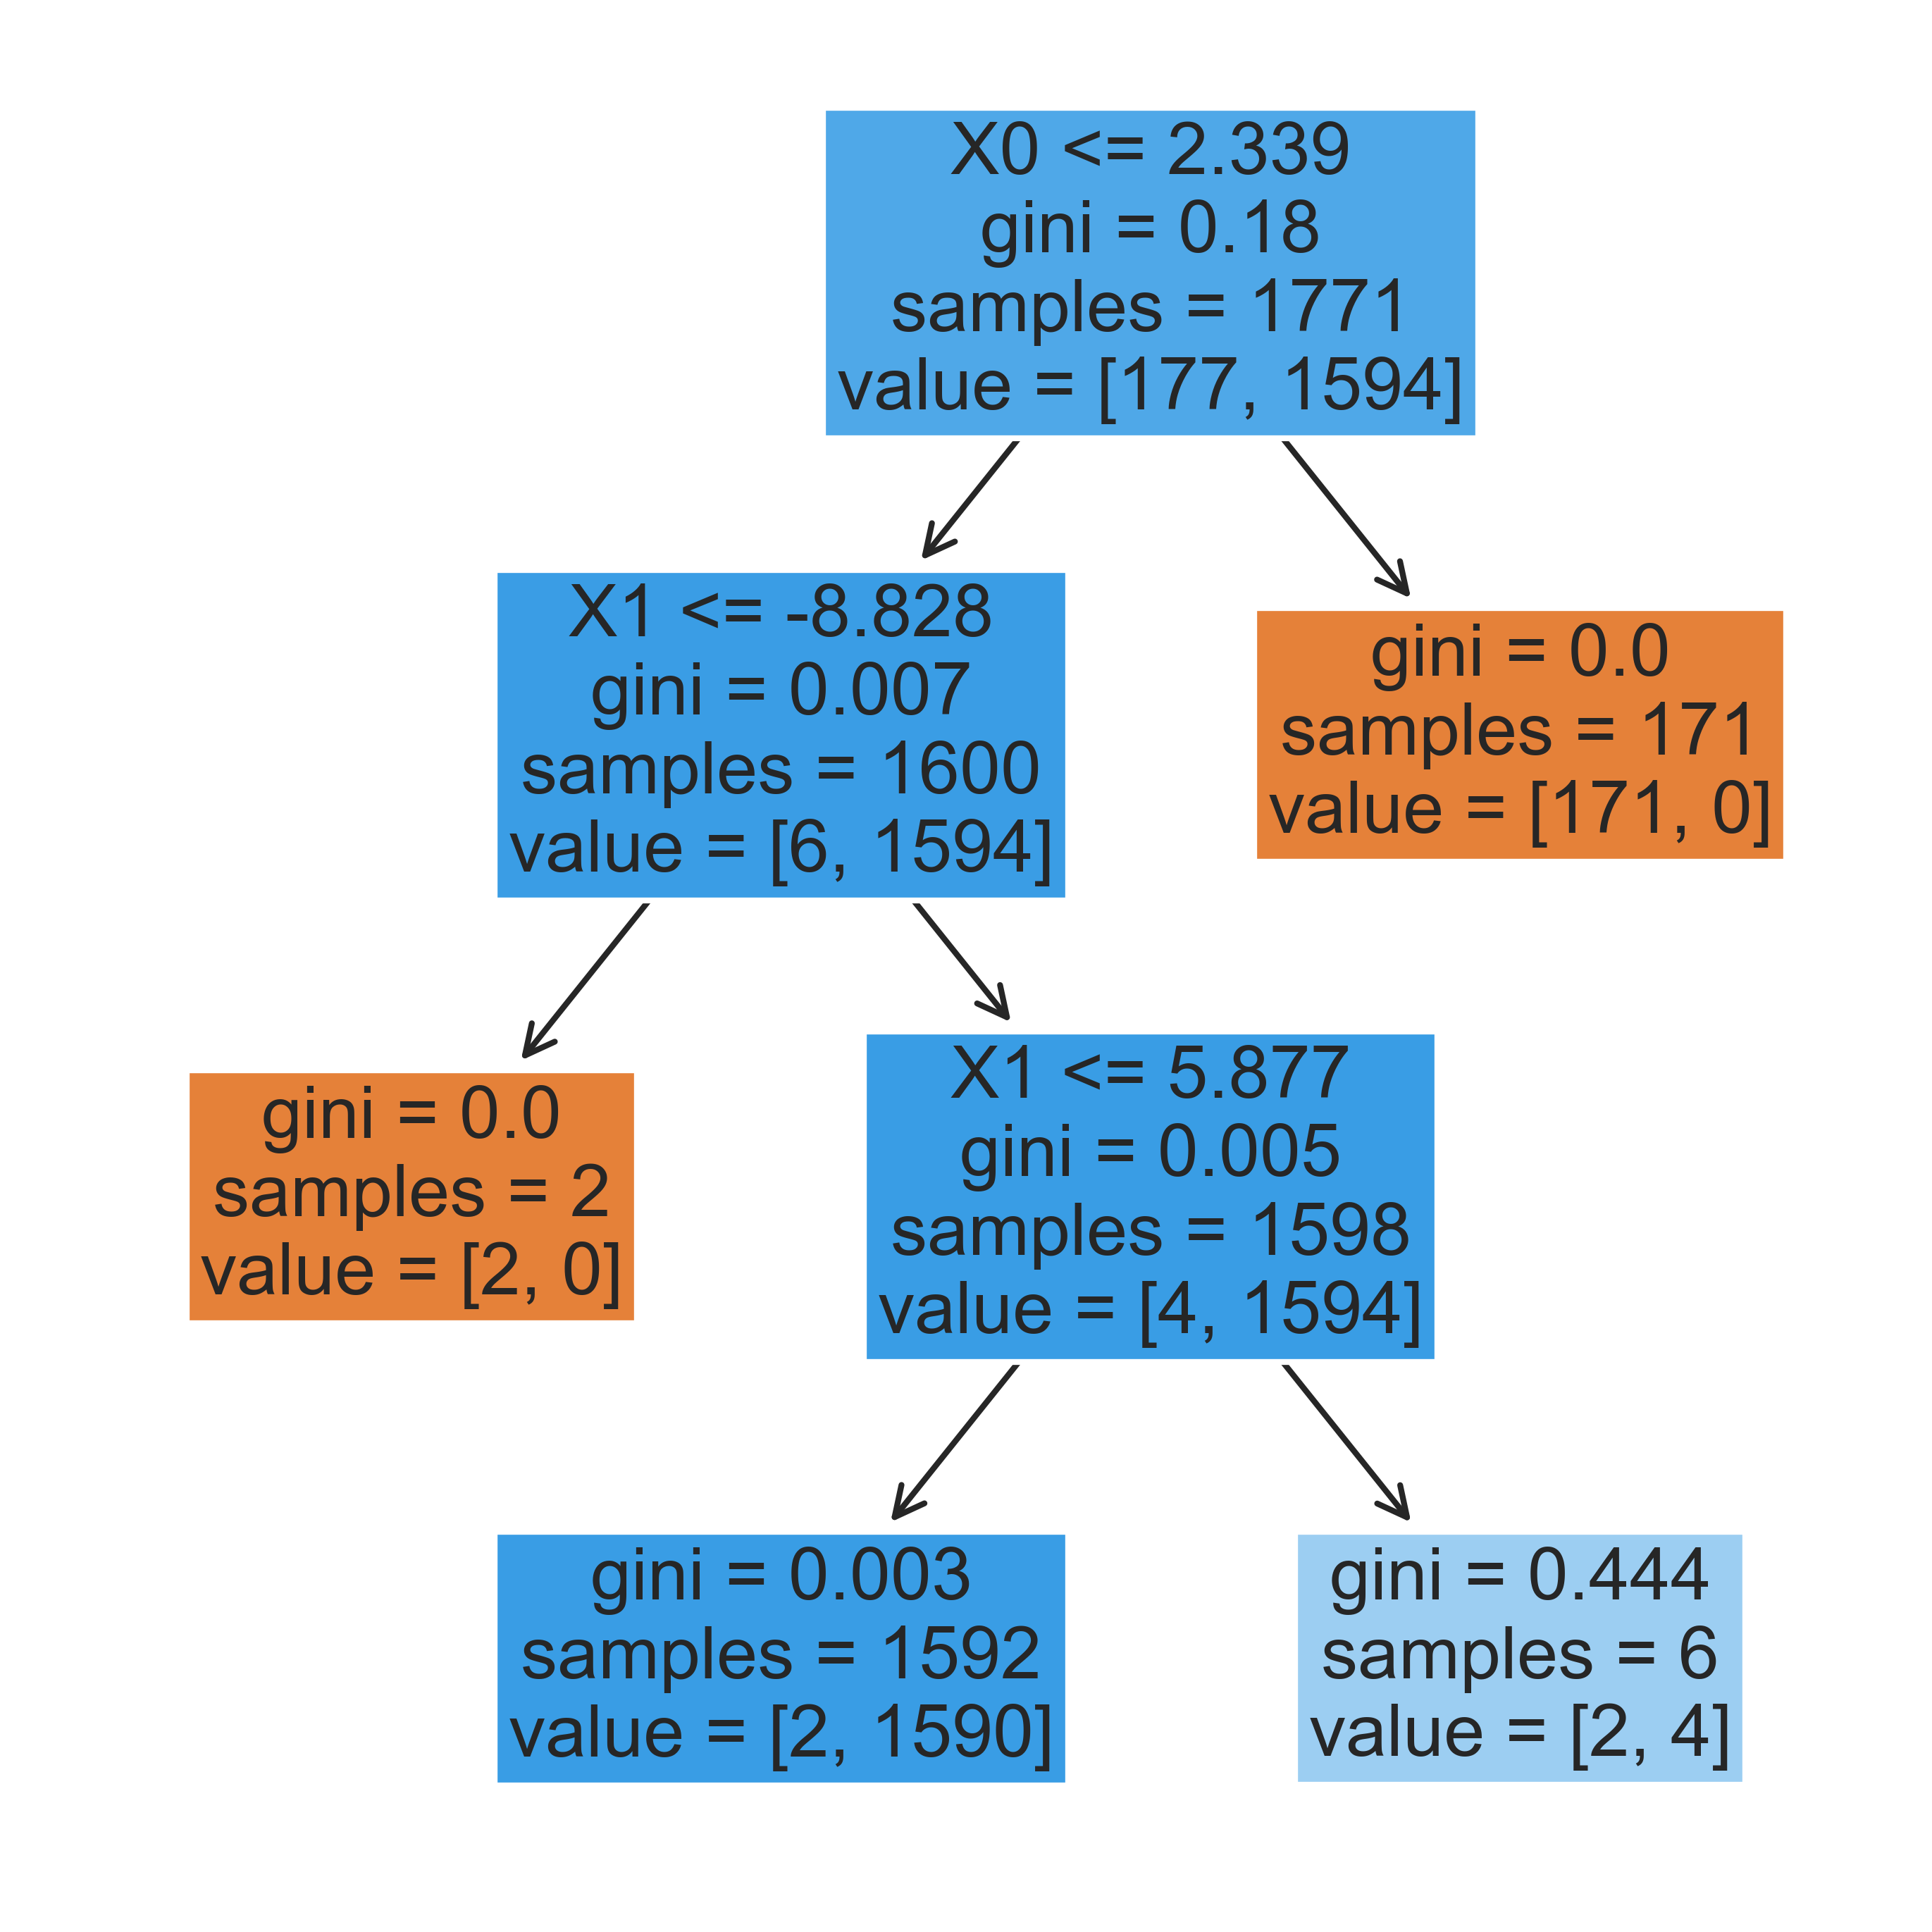

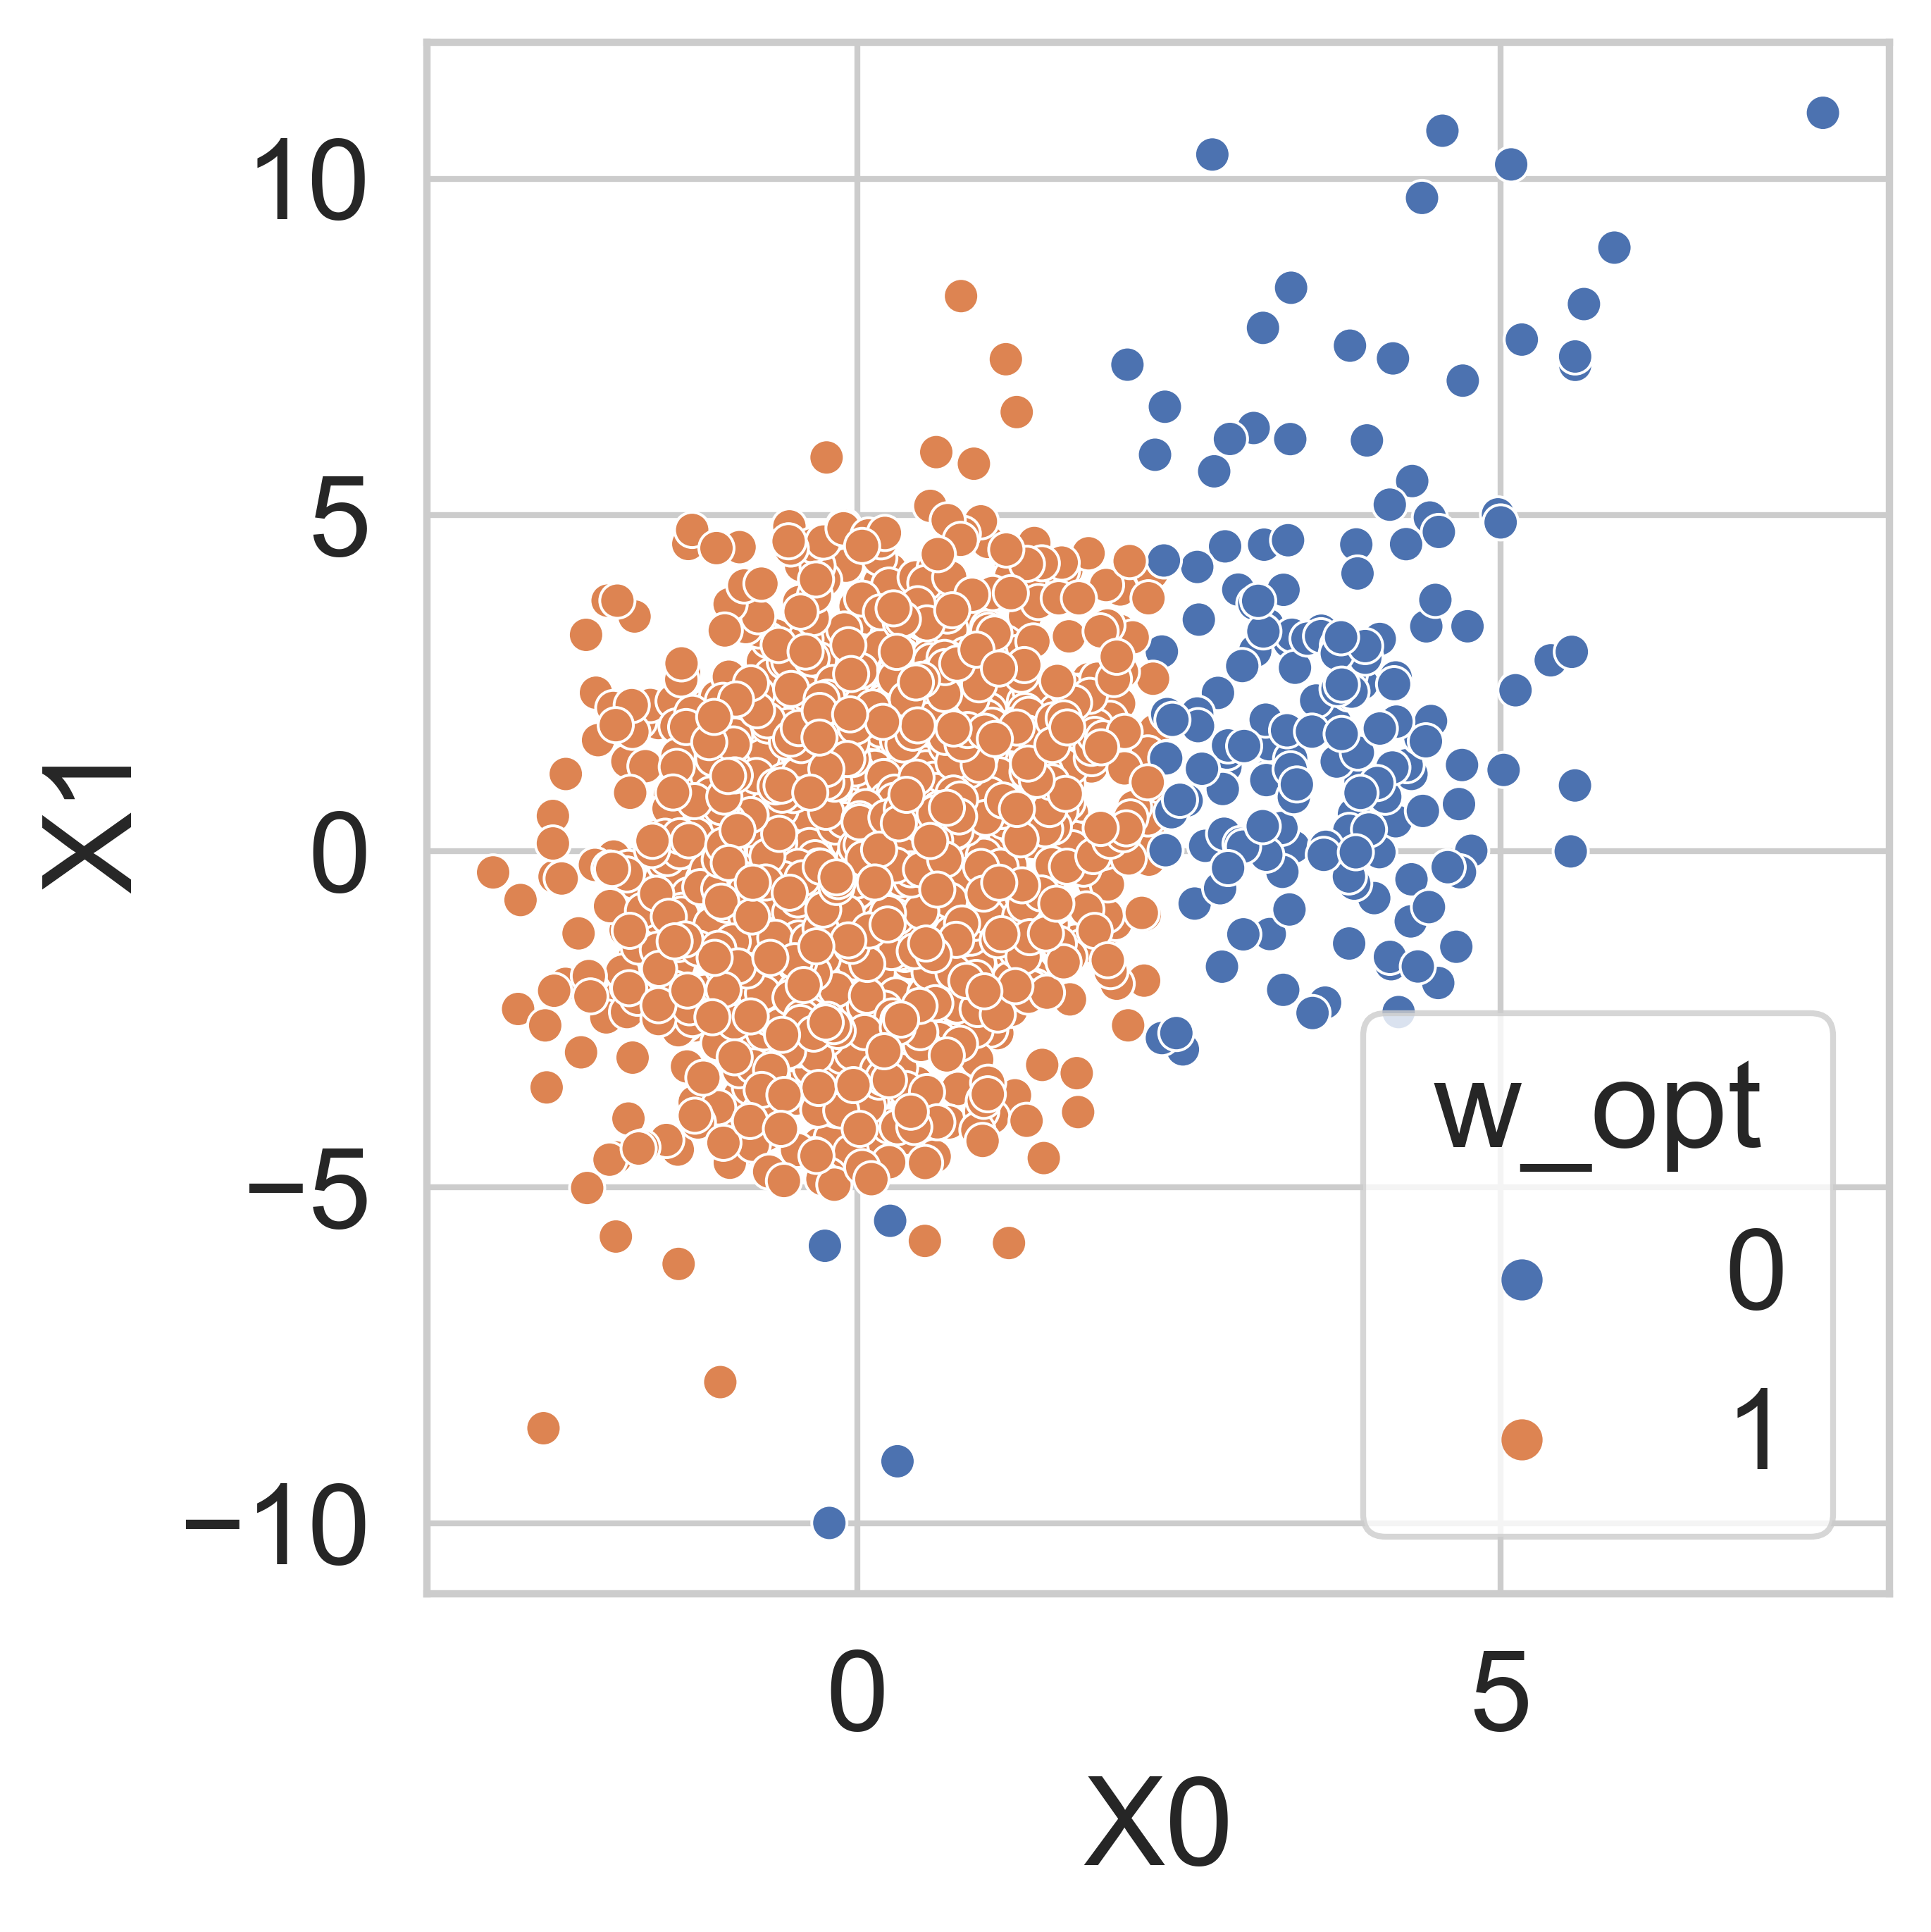

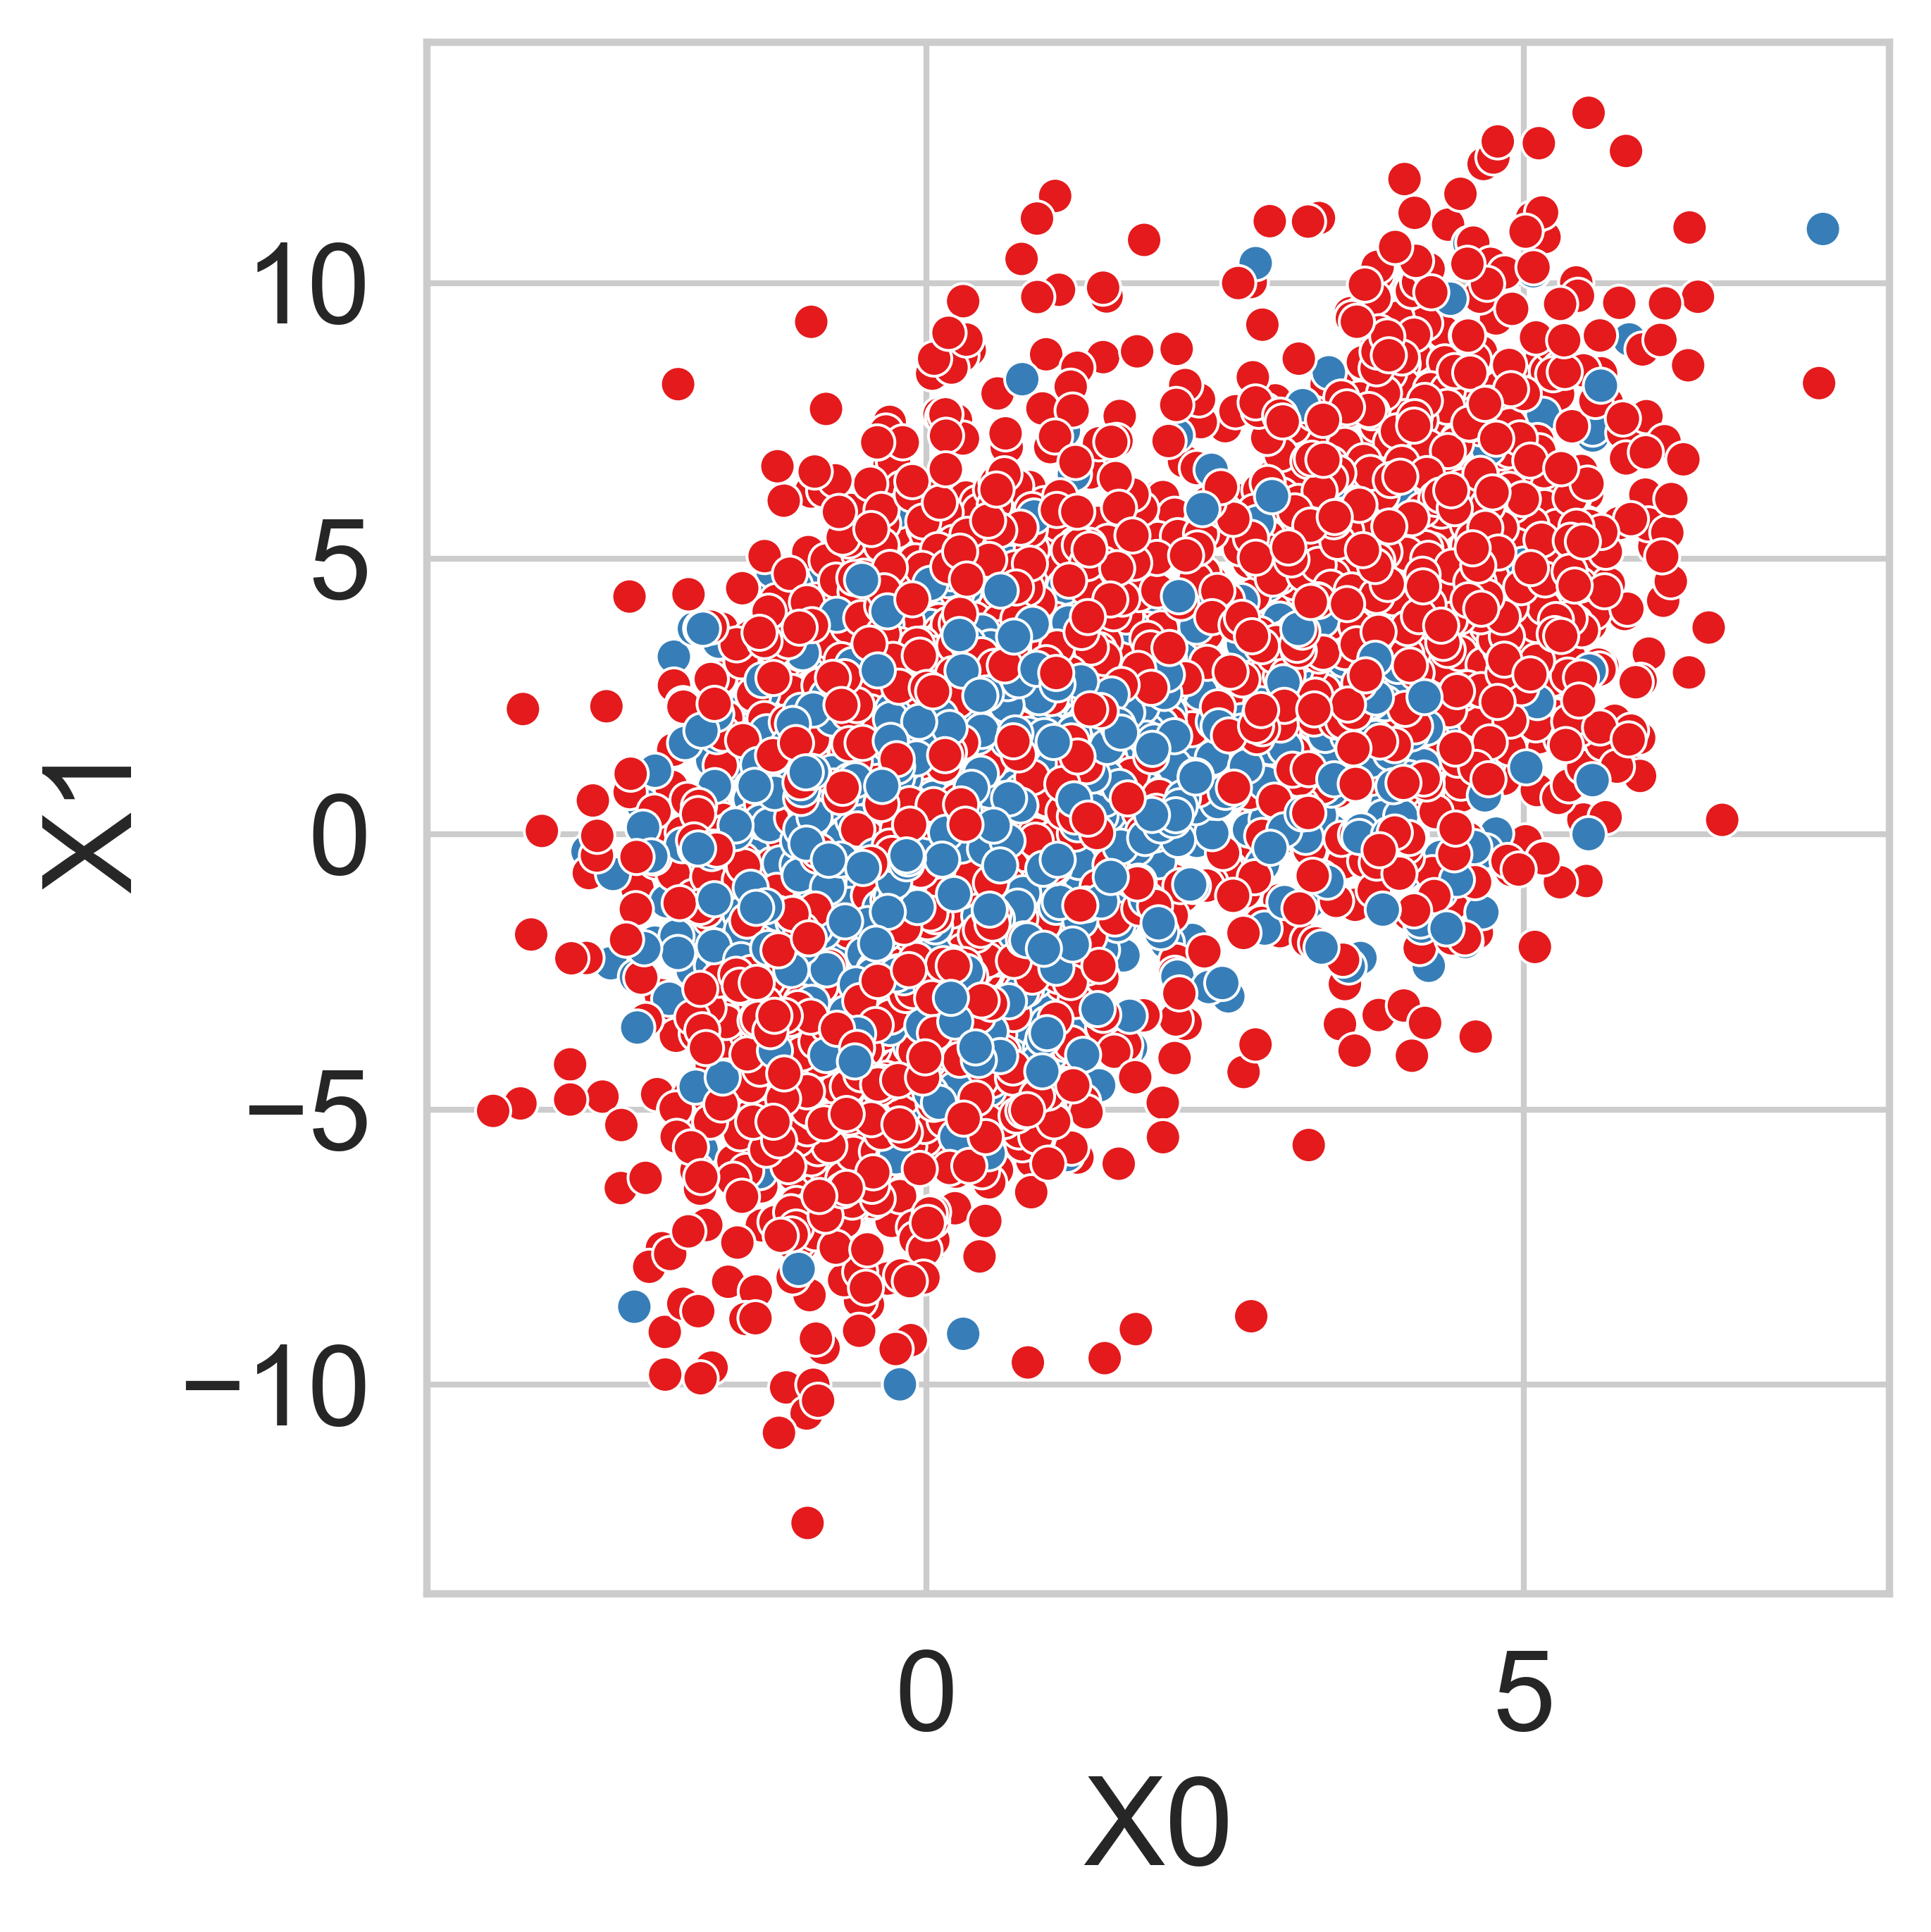

In [35]:
importlib.reload(learn)
D_rash, D_forest, w_forest, rashomon_set, f, testing_data = learn.forest_opt(
    data=df,
    outcome=outcome,
    treatment=treatment,
    sample=sample,
    leaf_proba=1,
    num_trees=3000,
    vote_threshold=1 / 2,
)
baseline_loss = np.sqrt(np.sum(D_forest["vsq"]) / ((np.sum((1 - D_forest["S"])) ** 2)))

fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
tree.plot_tree(
    f,
    filled=True,
    feature_names=df.drop(columns=[outcome, treatment, sample]).columns,
    ax=ax,
)
plt.tight_layout()
fig.savefig("explain_community.pdf", format="pdf", dpi=600)

fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
# sns.scatterplot(x="X0", y="X1", hue="S", data=df, ax=ax, palette="Set1", legend=False)
sns.scatterplot(x="X0", y="X1", hue="w_opt", data=D_rash, ax=ax)
# plt.legend(title="w")
plt.tight_layout()
fig.savefig("forest_community.pdf", format="pdf", dpi=600)

fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
sns.scatterplot(x="X0", y="X1", hue="S", data=df, ax=ax, palette="Set1", legend=False)
plt.tight_layout()

# Linear DGP

In [36]:
importlib.reload(all_linear)
df, Y, coef = all_linear.get_data(n=5000, seed=1)
outcome = "Yobs"
treatment = "T"
sample = "S"

(array([-4.18201994,  1.42942861, -0.95389448, ..., -0.6601245 ,
        0.00616464, -2.52296175]), array([0.01503804, 0.80681227, 0.27810228, ..., 0.34071164, 0.50154116,
       0.07426407]))


In [ ]:
importlib.reload(learn)
D_rash, D_forest, w_forest, rashomon_set, f, testing_data = learn.forest_opt(
    data=df,
    outcome=outcome,
    treatment=treatment,
    sample=sample,
    leaf_proba=1,
    num_trees=3000,
    vote_threshold=1 / 2,
)
baseline_loss = np.sqrt(np.sum(D_forest["vsq"]) / ((np.sum((1 - D_forest["S"])) ** 2)))

fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
tree.plot_tree(
    f,
    filled=True,
    feature_names=df.drop(columns=[outcome, treatment, sample]).columns,
    ax=ax,
)
plt.tight_layout()
fig.savefig("explain_linear.pdf", format="pdf", dpi=600)

fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
# sns.scatterplot(x="X0", y="X1", hue="S", data=df, ax=ax, palette="Set1", legend=False)
sns.scatterplot(x="X0", y="X1", hue="w_opt", data=D_rash, ax=ax)
# plt.legend(title="w")
plt.tight_layout()
fig.savefig("forest_linear.pdf", format="pdf", dpi=600)

fig, ax = plt.subplots(figsize=(5, 5), sharex=True, sharey=True, dpi=600)
sns.scatterplot(x="X0", y="X1", hue="S", data=df, ax=ax, palette="Set1", legend=False)
plt.tight_layout()